In [10]:
import pandas as pd


#read and parse the .csv features file for A1-turbine normalized data
df = pd.read_csv('Normalized Data/A1-turbine_normalized.txt', delimiter = '\t')
df.head()



,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,0.8462,0.8212,0.8488,0.0833,0.1500
1,0.9487,0.9226,0.9468,0.0833,0.1627
2,0.2821,0.2803,0.2764,0.5833,0.3712
3,0.2051,0.2042,0.2028,0.5833,0.3304
4,1.0000,0.9614,0.9413,0.8333,0.8948


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   #height_over_sea_level            451 non-null    float64
 1   fall                              451 non-null    float64
 2   net_fall                          451 non-null    float64
 3   flow                              451 non-null    float64
 4   power_of_hydroelectrical_turbine  451 non-null    float64
dtypes: float64(5)
memory usage: 17.7 KB


In [12]:
df.describe()

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
count,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.535221,0.516427,0.523289,0.486881,0.392635
std,0.284318,0.272583,0.271364,0.297155,0.250617
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307700,0.306350,0.302450,0.250000,0.185400
50%,0.538500,0.508600,0.521500,0.500000,0.360500
75%,0.794900,0.757850,0.760800,0.750000,0.577500
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
columns = df.shape[1]

# construct an array of arrays size (451, 4) for all features input values
inputcolumns = df.columns[0 : 4]
features = df[inputcolumns].values

# construct an array of size (451) for all features target values
outputcolumn = df.columns[4]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)


(451, 4)
(451,)


In [14]:
# divide the set into train and test set 
# use the first 85% for training and validation, and the remaining 15% for test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.15, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(383, 4)
(68, 4)
(383,)
(68,)


In [15]:
# divide the train set into train and validation set 
# use the first 85% for training , and the remaining 15% for validation
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.15, random_state= 42)

print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(325, 4)
(58, 4)
(325,)
(58,)


In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation="sigmoid"),
    tf.keras.layers.Dense(5, activation="sigmoid"),
    tf.keras.layers.Dense(1),
])

sgd = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer=sgd, loss = "mse", metrics=["mae"])
history = model.fit(x_train, y_train,validation_data=(x_validation, y_validation), epochs=200, verbose="2")


for i in range(0 , len(model.layers)):
    weights = model.layers[i].weights
    print(weights)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

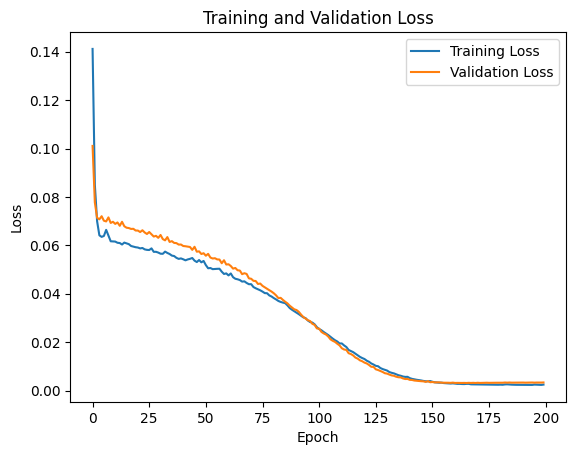

In [21]:
import matplotlib.pyplot as plt

# Plot the evolution of the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [18]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

#print(y_pred_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))

print("R2 score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))

11/11 [==============================] - 0s 2ms/step
R2 score:  0.9203517700784529
MSE:  0.0044888000064974435
MAE:  0.04966623177414431
R2 score:  0.9106984921411222
MSE:  0.005527504366707944
MAE:  0.054747978939643276


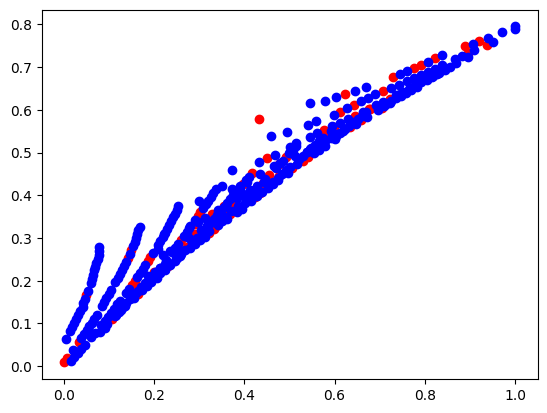

In [19]:
# scatterplot of predicted vs actual values
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred_test, color = 'red')
plt.scatter(y_train, y_pred_train, color = 'blue')
